# Exploratory Data Analysis (EDA) of Video Game Sales

## Introduction

From the early beginnings of Pac-Man to the latest interactive games, video games have become one of most popular ways to entertain. Choosing the right video game console to match ones gaming needs is essential to getting the full potential out of the player's gaming experience. Whether a hardcore gamer looking for that competitive edge, or an expressive storyteller wanting to captivate a narrative world, different consoles bring out something different in gamers. 

The video game industry encompasses companies that develop, publish and distribute video games, as well as those that produce hardware. According to [8marketcap](https://companiesmarketcap.com/video-games/largest-video-game-companies-by-market-cap/), some of the biggest video game developers include Electronic Arts, Ubisoft Entertainment Inc., Activision Blizzard Inc. (ATVI), Take-Two Interactive Software, Inc. (TTWO), Square Enix Holding Co. Ltd. (9684JP), and Sony Computer Entertainment Corporation (SNE). 

Today, let's explore how the gaming industry has evolved over the years, and analyse the different sales pattern in different regions. 

## Downloading the Dataset

To get started, we need to download the relevant dataset. The dataset we will be using comes from [Kaggle](https://www.kaggle.com/gregorut/videogamesales). This dataset contains a list of video games with sales greater than 100,000 copies. Each row in the dataset represents a game and contains the following features:

- **Rank**        - Ranking of overall sales

- **Name**        - The games name

- **Platform**    - Platform of the games release (i.e. PC,PS4, etc.)

- **Year**        - Year of the game's release

- **Genre**       - Genre of the game

- **Publisher**   - Publisher of the game

- **NA_Sales**    - Sales in North America (in millions)

- **EU_Sales**    - Sales in Europe (in millions)

- **JP_Sales**    - Sales in Japan (in millions)

- **Other_Sales** - Sales in the rest of the world (in millions)

- **Global_Sales** - Total worldwide sales.

We will download the dataset directly using the [opendatasets](https://github.com/JovianML/opendatasets) library.

In [ ]:
!pip install opendatasets --upgrade

# Downloading the dataset
import opendatasets as od

dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 
od.download(dataset_url)

# Provide personal kaggle username and API key

# Extract the downloaded dataset
import os

data_dir = './videogamesales'
os.listdir(data_dir)

## Data Preparation and Cleaning

We now have the **Video Game Sales** .csv file in our system. The next step is to read it into a python dataframe for easy manipulation. We will then delve into the data and perform any necessary data cleaning along the way. To do this, we will utilise python's [pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) library.



In [4]:
import pandas as pd

df = pd.read_csv("./videogamesales/vgsales.csv")
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


Panda's `.info()` method will give us information on the dataframe's column names, index dtype and non-null values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


We can see that there are **16598** entries. That's a lot of game titles! There also seems be some missing data. Let's use the `.isnull()` method to extract the features with the missing values and its total.

In [7]:
# Find columns with missing values
missing_val_count_by_column = (df.isnull().sum())
missing_val_count_by_column[missing_val_count_by_column > 0]

Year         271
Publisher     58
dtype: int64

There are two features with missing values. Since there is only 58 rows with missing **Publisher** (and considering the large size of our data) removing these entries will not affect our analysis too much. We can fill in the missing **Year** column with the median year of the data. We achieve these by using the `.dropna()` and `.fillna()` methods respectively.

In [8]:
# Drop NaN values in Publisher column
df.dropna(subset=["Publisher"], inplace=True) 

In [9]:
# Fill missing cells with column median
df["Year"].fillna((df["Year"].median()), inplace=True)

## Exploratory Analysis and Visualization

Now that our data is clean and complete, let's proceed to the next milestone: **Exploratory Analysis and Visualization**.



Let's begin by importing our visualization libraries `matplotlib.pyplot` and `seaborn`, and set our graph parameters.

In [8]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("darkgrid")

**Statistical Analysis**

In [11]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rank,16540.0,8294.197642,4790.703200,1.00,4143.75,8292.50,12440.25,16600.00
Year,16540.0,2006.414510,5.788794,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16540.0,0.265079,0.817929,0.00,0.00,0.08,0.24,41.49
EU_Sales,16540.0,0.146883,0.506129,0.00,0.00,0.02,0.11,29.02
JP_Sales,16540.0,0.077998,0.309800,0.00,0.00,0.00,0.04,10.22
Other_Sales,16540.0,0.048191,0.188879,0.00,0.00,0.01,0.04,10.57
Global_Sales,16540.0,0.538426,1.557424,0.01,0.06,0.17,0.48,82.74


Using python's `.describe()` method, we can perform statistical analysis on the numerical columns of our data and gather the following facts:

1. we are working with video game sales data made from **1980 through 2020**
2. the average global sales of one game is **\$538,426**
3. **North America** has the highest average sales per game compared to other regions
4. the highest sales amount ever made on one game amounted to **\$82.74 million globally**

**Exploring the relationship between Year and Global Sales**

From the following scatterplot, we can see that most game titles made global sales of below roughly **$15 million** mark, with some exceptionally good ones going beyond that. We even notice some outliers, with one game in particular released in 2006 making a breakthrough.

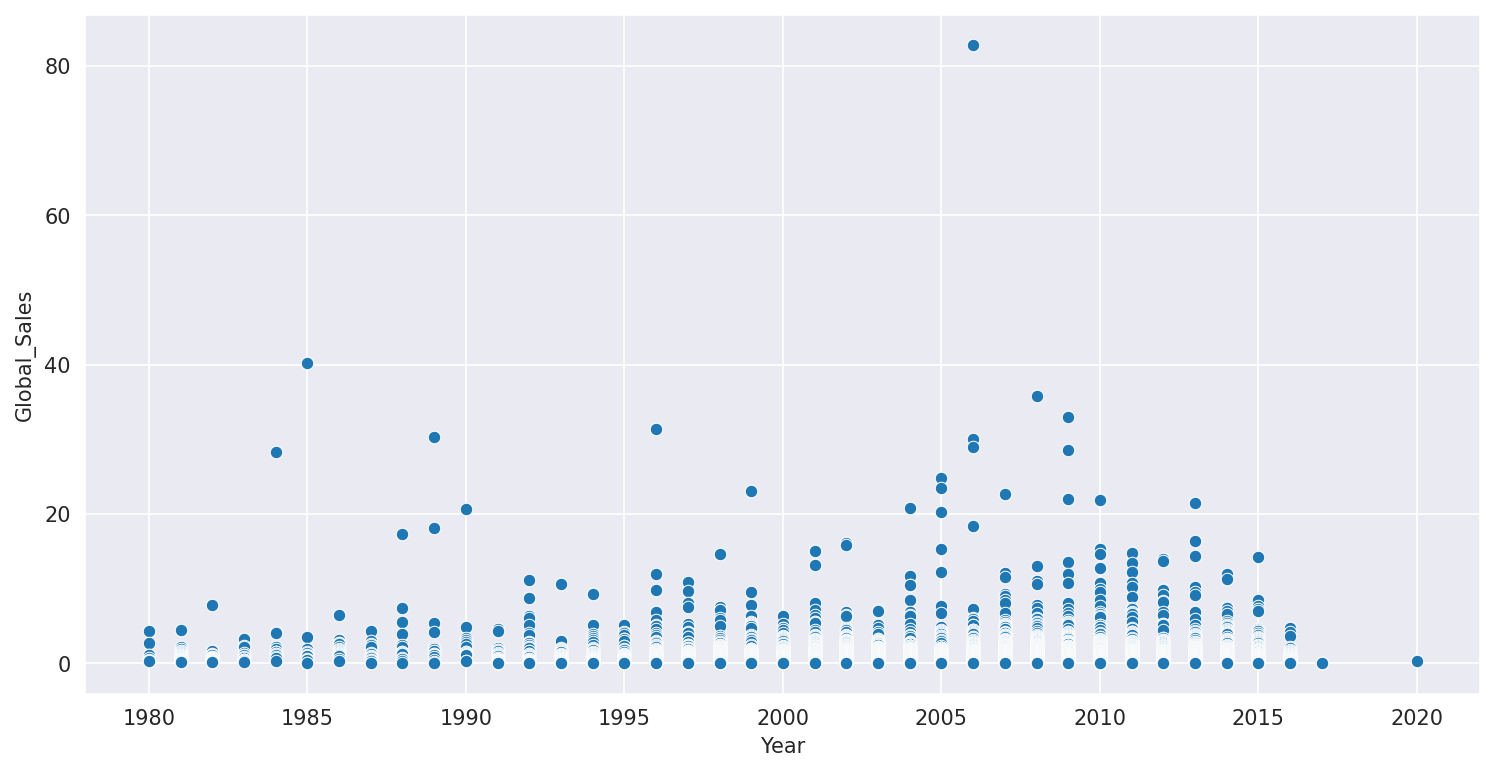

In [12]:
plt.figure(figsize=(12,6), dpi=150)
sns.scatterplot(data=df,
                x="Year",
                y="Global_Sales")

plt.show()

**Total Count of Games for each Platform**

**PlayStation 2** and **Nintendo DS** have the most game titles in their platform. In fact, they are almost equal in count, which makes it all the more interesting to see.

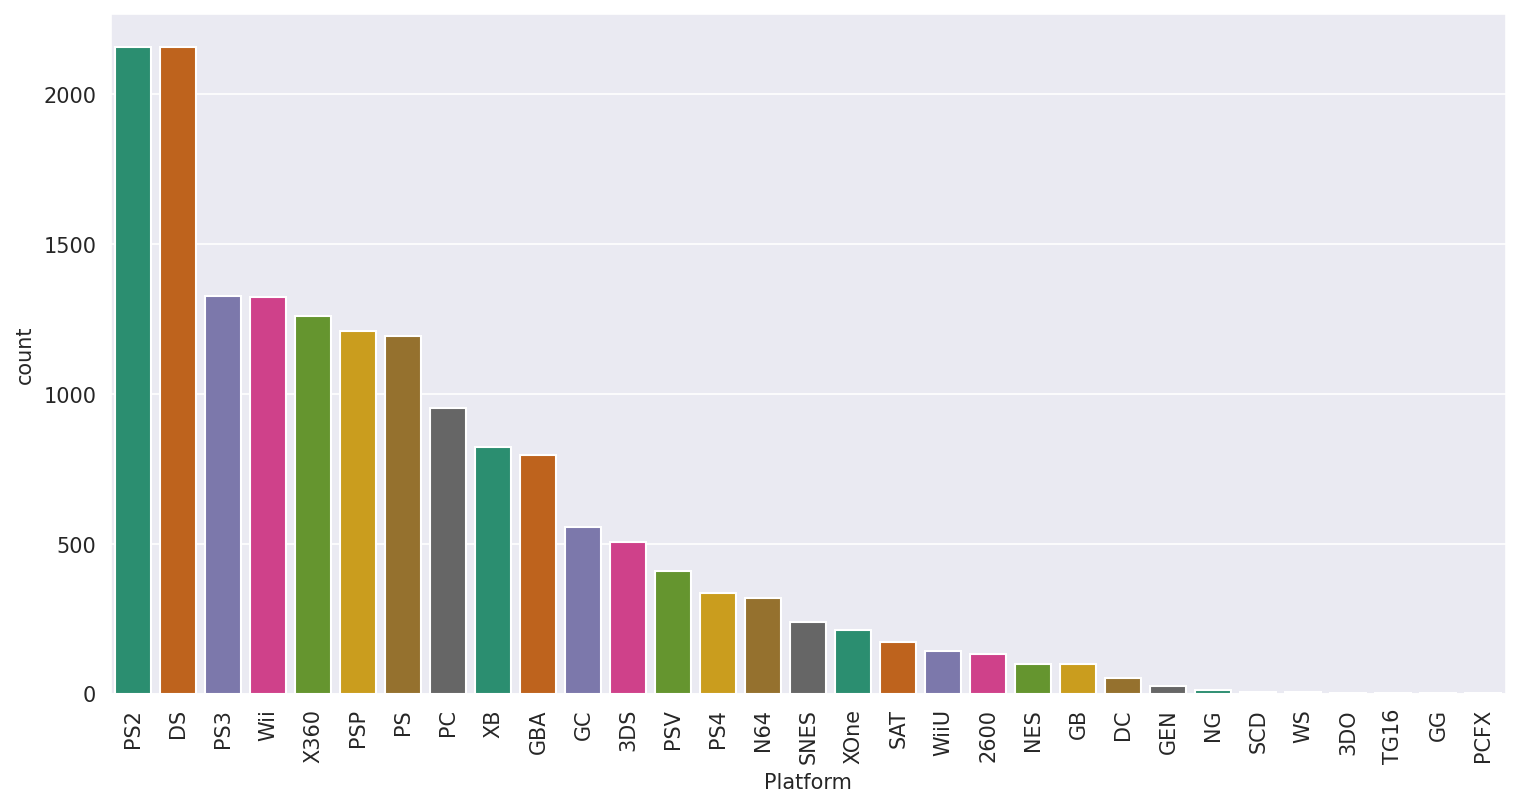

In [13]:
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df,
              x="Platform",
              order = df["Platform"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

**Total Count of Games for each Genre** 

**Action** seems to be the genre where most game title can be found, with Sports, Misc and Role-Playing following not too far behind. Puzzle appears to be the least popular among game developers. 

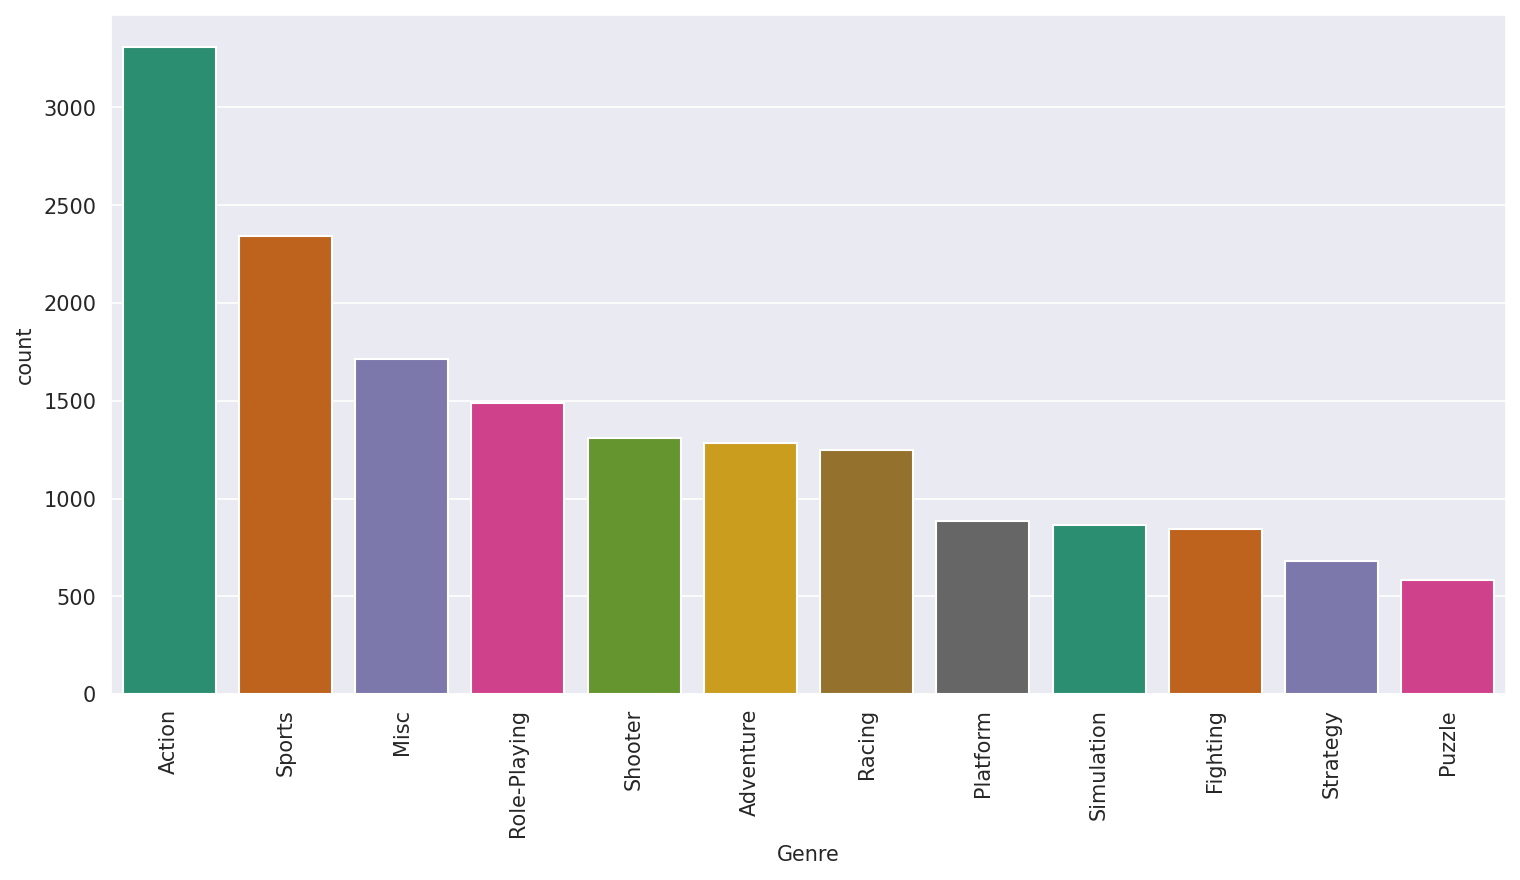

In [14]:
plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=df,
              x="Genre",
              order = df["Genre"].value_counts().index,
              palette="Dark2")
plt.xticks(rotation=90)
plt.show()

**Explore correlation between features** 

It is expected that all the sales columns are correlated to one another based on the heatmap below. There seems to be no significant correlation between the other columns.

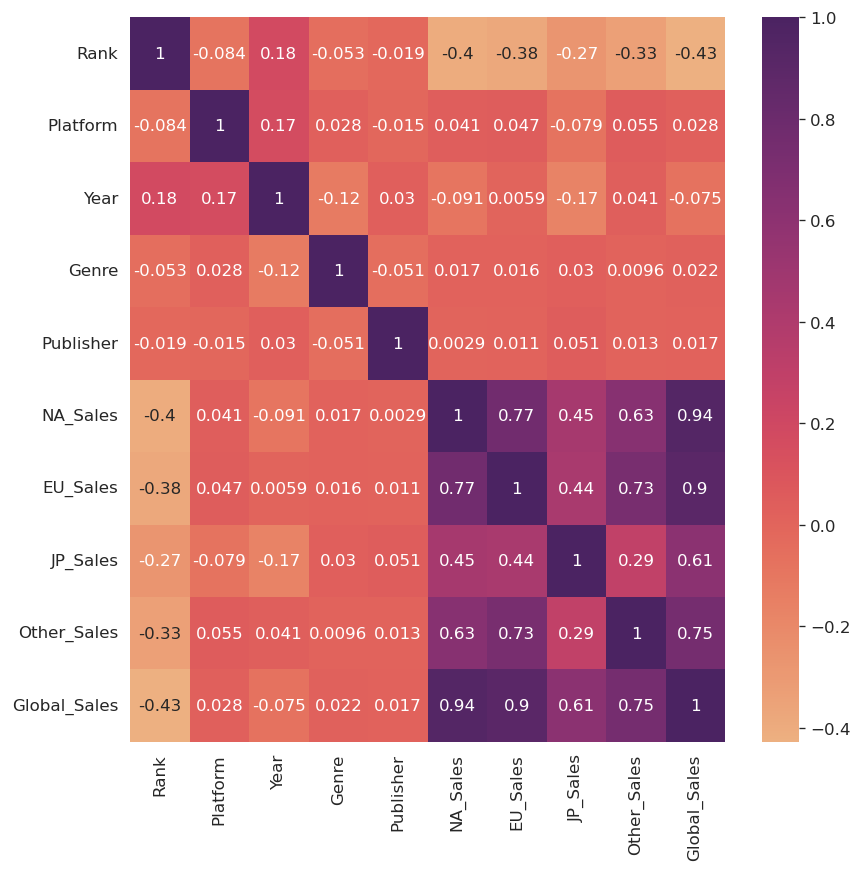

In [15]:
from sklearn.preprocessing import LabelEncoder

# Encode selected categorical columns to prepare for heatmap plotting
encoded_df = df.copy()
categ = ["Platform", "Genre", "Publisher"]
encoder = LabelEncoder()
encoded_df[categ] = encoded_df[categ].apply(encoder.fit_transform)

# Create correlation heatmap
plt.figure(figsize=(8, 8), dpi=120)
sns.heatmap(encoded_df.corr(), 
            cmap="flare",
            annot=True)

plt.show()

## Asking and Answering Questions

#### Q1: What are the top 10 games making the most sales globally?

In [18]:
# Using the `.nlargest()` method, we can easily extract the top n values of a dataframe
df.nlargest(10, "Global_Sales")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


#### Q2: What are the top 5 gaming Genres that are making high sales?

In [19]:
# We will the `.groupby()`method to consolidate the indivisual genre, and the `.agg()` method to perform the sum function
sales_genre = df.groupby("Genre").agg({"Global_Sales": pd.Series.sum})
sales_genre.nlargest(5, "Global_Sales")

,Global_Sales
Genre,
Action,1750.33
Sports,1329.35
Shooter,1037.32
Role-Playing,927.31
Platform,830.87


#### Q3: - Which game made the most sales per region and globally?

In [20]:
print(f"NA: {df.nlargest(1, 'NA_Sales').values[0,1]}")
print(f"EU: {df.nlargest(1, 'EU_Sales').values[0,1]}")
print(f"JP: {df.nlargest(1, 'JP_Sales').values[0,1]}")
print(f"Other: {df.nlargest(1, 'Other_Sales').values[0,1]}")
print(f"Global: {df.nlargest(1, 'Global_Sales').values[0,1]}")

NA: Wii Sports
EU: Wii Sports
JP: Pokemon Red/Pokemon Blue
Other: Grand Theft Auto: San Andreas
Global: Wii Sports


#### Q4:- Which Publishers made the most sales?

In [23]:
sales_publisher = df.groupby("Publisher").agg({"Global_Sales": pd.Series.sum})
sales_publisher.nlargest(5, "Global_Sales")

,Global_Sales
Publisher,
Nintendo,1786.56
Electronic Arts,1110.32
Activision,727.46
Sony Computer Entertainment,607.50
Ubisoft,474.72


#### Q5: What PC-FX games were sold?

In [29]:
df.query("Platform == 'PCFX'")

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
14556,14559,Blue Breaker: Ken Yorimo Hohoemi o,PCFX,1996.0,Role-Playing,NEC,0.0,0.0,0.03,0.0,0.03


**Q6: Are there any games that made lesser sales than this one game on PC-FX? If yes, how many are there?**

In [37]:
# The `.len()` method will return the count of rows
len(df.query("Global_Sales < 0.03"))

1674

## Inferences

Based on our analysis, we can draw the following inferences:

- **Wii Sports**, published in 2006, made the most sales worldwide. This is echoed by both NA and EU regions. However, it is a different story in other regions, with **Pokemon Red/Pokemon Blue** dominating in Japan and **Grand Theft Auto: San Andreas** everywhere else
- **50%** of top 10 games utilized the **Wii Platform**, making it one of the most successful consoles. This could be because of the fact the the Wii system was one of the most innovative consoles in its time out there by taking advantage of motion controls
- **Action, Sports and Shooter** are the most popular genres with high game titles as well as high global sales made
- **Nintendo** snatch the spot for the Publisher that made the most global sales. Unsurprising is the fact that the top 10 games are all published by Nintendo!
- The PC-FX console had only one game title in its arsenal, which was published only in Japan. Interestingly enough, it is not the game that made the least amount of sales.

## References

Check out the following resources to learn more about the dataset and tools used in this notebook:

- Kaggle Video Game Sales dataset: https://www.kaggle.com/gregorut/videogamesales
- Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
- Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html
- Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html
- `opendatasets` Python library: https://github.com/JovianML/opendatasets